In [17]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

In [2]:
dfJan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
dfFeb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')

In [3]:
dfJan['trip duration'] = dfJan['tpep_dropoff_datetime'] - dfJan['tpep_pickup_datetime']
dfJan['trip duration'] = dfJan['trip duration'].apply(lambda x: x.total_seconds() / 60)

In [4]:
dfJan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [5]:
dfJan['trip duration'].describe(percentiles=[.95,.98,.99])

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
50%      1.163333e+01
95%      3.793333e+01
98%      5.100000e+01
99%      6.045000e+01
max      9.455400e+03
Name: trip duration, dtype: float64

In [6]:
dfJanClean = dfJan[(dfJan['trip duration'] >= 1) & (dfJan['trip duration'] < 60)]

In [7]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [8]:
dfJanClean[categorical] = dfJanClean[categorical].astype(str)

/tmp/ipykernel_29469/1450422539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJanClean[categorical] = dfJanClean[categorical].astype(str)


In [9]:
train_dicts = dfJanClean[categorical + numerical].to_dict(orient='records')

In [10]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [15]:
target = 'trip duration'
y_train = dfJanClean[target].values

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

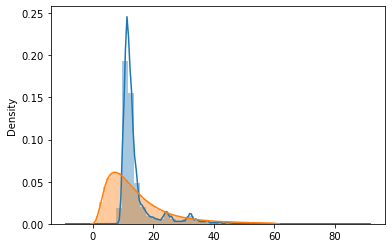

In [21]:
sns.distplot(y_pred, label='predict')
sns.distplot(y_train, label= 'actual')